In [3]:
import mne
from bids import BIDSLayout
from utils.utils import LAB_root
bids_root = mne.datasets.epilepsy_ecog.data_path()
layout = BIDSLayout(LAB_root + "/BIDS-1.0_SentenceRep/BIDS")
filt = mne.io.read_raw_fif(layout.root + "/derivatives/sub-D00" + str(29) + "_" + "SentenceRep" + "_filt_ieeg.fif")


Opening raw data file C:\Users\ae166\Box\CoganLab\BIDS-1.0_SentenceRep\BIDS/derivatives/sub-D0029_SentenceRep_filt_ieeg.fif...
    Range : 0 ... 3805183 =      0.000 ...  1858.000 secs
Ready.
Opening raw data file C:\Users\ae166\Box\CoganLab\BIDS-1.0_SentenceRep\BIDS\derivatives\sub-D0029_SentenceRep_filt_ieeg-1.fif...
    Range : 3805184 ... 7610367 =   1858.000 ...  3716.000 secs
Ready.
Opening raw data file C:\Users\ae166\Box\CoganLab\BIDS-1.0_SentenceRep\BIDS\derivatives\sub-D0029_SentenceRep_filt_ieeg-2.fif...
    Range : 7610368 ... 9328639 =   3716.000 ...  4555.000 secs
Ready.


In [8]:
params = dict(method='multitaper', fmin=55, fmax=65, tmax=300,
              bandwidth=4, n_jobs=8)
fpsd = filt.compute_psd(**params)
fpsd.plot(average=True)

MemoryError: Unable to allocate 11.1 GiB for an array with shape (1200, 622081) and data type complex128

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.000 (s)


C:\Users\ae166\.conda\envs\preprocess\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


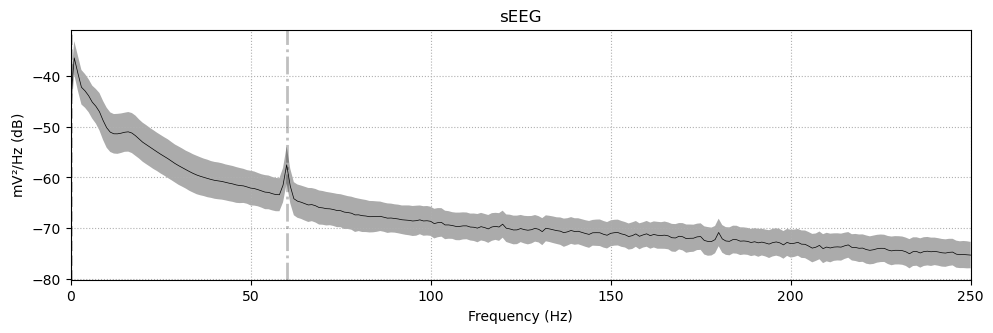

In [7]:
filt.plot_psd(average=True , fmax = 250)